# **Tugas 2 Laboratorium Kecerdasan Buatan - Regresi Linear**

Di tugas ini, anda bertugas untuk melakukan beberapa hal. 

* **Tugas pertama yang anda harus lakukan adalah mengumpulkan dataset yang ingin anda gunakan, membangun dataset baru sesuai kebutuhan anda, membersihkan, dan memvalidasi dataset tersebut.**

* **Tugas kedua adalah menganalisa data untuk tiap-tiap variabel, dan memastikan hubungan antar variabel, dan menemukan kesimpulan tentang data yang anda miliki.**

* **Tugas ketiga adalah menggunakan kesimpulan tadi, untuk melihat data mana saja yang cocok digunakan untuk membangun model regresi. Anda juga ditugaskan untuk membangun dan memvisualisasikan model regresi linear tersebut.**

## Import Library

Disini lakukan import terhadap library yang anda butuhkan. Ingat bahwa anda perlu melakukan pengumpulan dan membangun dataset, memahami kondisi data secara visual, melihat kondisi statistik deskriptif dan persebaran data.

In [1]:
# Import library
import pandas as pd               # Untuk tabel data
from scipy import stats           # Untuk statistik
import numpy as np                # Untuk perhitungan matriks dan data
import seaborn as sns             # Untuk visualisasi data
import matplotlib.pyplot as plt   # Untuk menampilkan data
%matplotlib inline 

import statsmodels as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

Disini, anda akan menghubungkan sumber data anda kedalam notebook. Lalu, anda akan memasukkan dataset-dataset yang anda gunakan kedalam program disini.

### Masukkan dataset-dataset anda kedalam program
Pada tugas ini, saya akan menggunakan dataset Titanic yang mana tersedia Kaggle. Kalian juga dapat mengunduhnyadata dahulu dari [Kaggle](https://www.kaggle.com/datasets/whenamancodes/covid-19-coronavirus-pandemic-dataset)

Lakukan pemanggilan `csv` sehingga kita bisa menggunakan pandas untuk membaca filenya.


> `df = pd.read_csv('.....')`


In [2]:
df = pd.read_csv('covid_live.csv')

### Melihat isi Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  230 non-null    int64  
 1   Country,
Other     230 non-null    object 
 2   Total
Cases        230 non-null    object 
 3   Total
Deaths       225 non-null    object 
 4   New
Deaths         3 non-null      float64
 5   Total
Recovered    214 non-null    object 
 6   Active
Cases       215 non-null    object 
 7   Serious,
Critical  147 non-null    object 
 8   Tot Cases/
1M pop  228 non-null    object 
 9   Deaths/
1M pop     223 non-null    object 
 10  Total
Tests        214 non-null    object 
 11  Tests/
1M pop      214 non-null    object 
 12  Population         228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


Secara umum, gdp.head() akan menampilkan 5 barisan teratas dari dataset, tetapi kita juga bisa menampilkan 5 baris terbawah sesuai yang kita inginkan. Contohnya: `gdp.head()` dan `gdp.tail()` akan menampilkan baris terbawah

In [4]:
df.head() 

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [5]:
df.tail()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"
229,230,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Preprocessing

Disini, tugas anda adalah melakukan beberapa ***treatment***, atau "tindakan" terhadap data. Anda akan mengubah susunan dan bentuk data, pembersihan, dan validasi.

### Data Wrangling

Ubahlah data anda kedalam bentuk yang lebih masuk akal. Contohnya adalah :
* Mengubah index atau label baris tabel
* Agregasi data
* Menggabungkan beberapa dataset menjadi satu
* Mengatur ulang bagaimana data disajikan dalam tabel
* Mengurutkan data dengan baik dan benar
* Menyaring data sesuai kebutuhan

In [6]:
# Jelaskan tahapan yang kalian lakukan disini

#### Rename untuk atribut nama kolom

0: Other <br>
1: Country <br>
2: Total Cases <br>
3: Total Deaths <br>
4: New Deaths <br>
5: Total Recovered <br>
6: Active Cases <br>
7: Serious Critical <br>
8: Total Cases in 1 milion Population <br>
9: Deaths in 1 milion Population <br>6: Active Cases <br>
10: Total Tests <br>
11: Test in 1 Miliion Population <br>
12: Population <br>

In [7]:
column_header = ["other", "country", "totalCases", "totalDeaths", "newDeaths", "totalRecovered", "activeCases", 
                 "seriousCritical", "totCasesIn1MPop", "deathsIn1MPop", "totalTests", "testIn1MPop", "population"]

df.columns = column_header

In [8]:
df

,other,country,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,227,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"


In [9]:
# Menghapus tanda koma pada data berangka

df['totalCases'] = df['totalCases'].str.replace(",", "")
df['totalDeaths'] = df['totalDeaths'].str.replace(",", "")
df['totalRecovered'] = df['totalRecovered'].str.replace(",", "")
df['activeCases'] = df['activeCases'].str.replace(",", "")
df['seriousCritical'] = df['seriousCritical'].str.replace(",", "")
df['totCasesIn1MPop'] = df['totCasesIn1MPop'].str.replace(",", "")
df['deathsIn1MPop'] = df['deathsIn1MPop'].str.replace(",", "")
df['totalTests'] = df['totalTests'].str.replace(",", "")
df['testIn1MPop'] = df['testIn1MPop'].str.replace(",", "")
df['population'] = df['population'].str.replace(",", "")

In [10]:
df

,other,country,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,USA,98166904,1084282,NaN,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,NaN,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,NaN,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,NaN,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,NaN,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,NaN,NaN,80,0,NaN,49322,NaN,NaN,NaN,1622
226,227,Vatican City,29,NaN,NaN,29,0,NaN,36295,NaN,NaN,NaN,799
227,228,Tuvalu,20,NaN,NaN,NaN,20,NaN,1658,NaN,NaN,NaN,12066
228,229,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,626161


### Data Cleansing

Bersihkan data! 
* Pastikan tidak ada kolom kosong. Jika ada, lakukan tindakan yang tepat. Apakah anda akan menggantinya dengan rata-rata? Dengan median? atau modus? Atau dengan nilai lainnya? 
* Apakah ada data duplikat? 
* Apakah ada *outlier*? Lalu, bagaimana tindakan anda? Jelaskan alasan anda!

In [11]:
# Jelaskan tahapan pembersihan data yang anda gunakan !

#### Mengecek missing values

In [12]:
df.isnull().sum()

other                0
country              0
totalCases           0
totalDeaths          5
newDeaths          227
totalRecovered      16
activeCases         15
seriousCritical     83
totCasesIn1MPop      2
deathsIn1MPop        7
totalTests          16
testIn1MPop         16
population           2
dtype: int64

Coba kita lihat berapa persebaran missing values terhadap jumlah data kita

In [13]:
# persentase missing values terhadap jumlah data
print('The Percentage of missing values in totalDeaths is: {}%'.format(df.isnull().sum()['totalDeaths'] / len(df) * 100))
print('The Percentage of missing values in newDeaths is: {}%'.format(df.isnull().sum()['newDeaths'] / len(df) * 100))
print('The Percentage of missing values in totalRecovered is: {}%'.format(df.isnull().sum()['totalRecovered'] / len(df) * 100))
print('The Percentage of missing values in activeCases is: {}%'.format(df.isnull().sum()['activeCases'] / len(df) * 100))
print('The Percentage of missing values in seriousCritical is: {}%'.format(df.isnull().sum()['seriousCritical'] / len(df) * 100))
print('The Percentage of missing values in totCasesIn1MPop is: {}%'.format(df.isnull().sum()['totCasesIn1MPop'] / len(df) * 100))
print('The Percentage of missing values in deathsIn1MPop is: {}%'.format(df.isnull().sum()['deathsIn1MPop'] / len(df) * 100))
print('The Percentage of missing values in totalTests is: {}%'.format(df.isnull().sum()['totalTests'] / len(df) * 100))
print('The Percentage of missing values in testIn1MPop is: {}%'.format(df.isnull().sum()['testIn1MPop'] / len(df) * 100))
print('The Percentage of missing values in population is: {}%'.format(df.isnull().sum()['population'] / len(df) * 100))

The Percentage of missing values in totalDeaths is: 2.1739130434782608%
The Percentage of missing values in newDeaths is: 98.69565217391305%
The Percentage of missing values in totalRecovered is: 6.956521739130435%
The Percentage of missing values in activeCases is: 6.521739130434782%
The Percentage of missing values in seriousCritical is: 36.08695652173913%
The Percentage of missing values in totCasesIn1MPop is: 0.8695652173913043%
The Percentage of missing values in deathsIn1MPop is: 3.0434782608695654%
The Percentage of missing values in totalTests is: 6.956521739130435%
The Percentage of missing values in testIn1MPop is: 6.956521739130435%
The Percentage of missing values in population is: 0.8695652173913043%


> Lihat kembali data kita! Apakah data termasuk MNAR, MCAR, atau MAR?
Setelah dilihat kembali, kebanyakan missing values termasuk MAR yang dimungkinkan karena data tersebut bersifat sensitif. Oleh sebab itu, mari kita menggantinya dengan 0.

In [14]:
df['totalDeaths'] = df['totalDeaths'].replace(np.nan, 0)
df['newDeaths'] = df['newDeaths'].replace(np.nan, 0)
df['totalRecovered'] = df['totalRecovered'].replace(np.nan, 0)
df['activeCases'] = df['activeCases'].replace(np.nan, 0)
df['seriousCritical'] = df['seriousCritical'].replace(np.nan, 0)
df['totCasesIn1MPop'] = df['totCasesIn1MPop'].replace(np.nan, 0)
df['deathsIn1MPop'] = df['deathsIn1MPop'].replace(np.nan, 0)
df['totalTests'] = df['totalTests'].replace(np.nan, 0)
df['testIn1MPop'] = df['testIn1MPop'].replace(np.nan, 0)
df['population'] = df['population'].replace(np.nan, 0)

In [15]:
df

,other,country,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,USA,98166904,1084282,0.0,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,0.0,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,0.0,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,0.0,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,0.0,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0.0,80,0,0,49322,0,0,0,1622
226,227,Vatican City,29,0,0.0,29,0,0,36295,0,0,0,799
227,228,Tuvalu,20,0,0.0,0,20,0,1658,0,0,0,12066
228,229,Western Sahara,10,1,0.0,9,0,0,16,2,0,0,626161


`kita cek kembali data kita`

In [16]:
df.isnull().sum()

other              0
country            0
totalCases         0
totalDeaths        0
newDeaths          0
totalRecovered     0
activeCases        0
seriousCritical    0
totCasesIn1MPop    0
deathsIn1MPop      0
totalTests         0
testIn1MPop        0
population         0
dtype: int64

### Data Validation

Disini, tugas anda adalah memastikan data yang anda miliki valid. Contohnya : 
* Tipe Data tiap kolom sudah tepat (Cth: NIM dan ID dalam string)
* Tiap Data berada dalam range yang masuk akal (Cth: Umur manusia tidak ada yang minus)
* Tiap Data dalam satuan, unit, ataupun bernilai yang tepat dan masuk akal (Cth: Kecepatan dalam m/s dan bukan mph, umur dalam tahun, bukan dalam hari atau detik)

In [17]:
# Jelaskan tahapan validasi anda!

sebelum kita lakukan split data, kita ubah dulu tipe data untuk tiap kolom

In [18]:
# tipe data sebelum diubah
df.dtypes

other                int64
country             object
totalCases          object
totalDeaths         object
newDeaths          float64
totalRecovered      object
activeCases         object
seriousCritical     object
totCasesIn1MPop     object
deathsIn1MPop       object
totalTests          object
testIn1MPop         object
population          object
dtype: object

In [19]:
# ubah tipe data dengan menyesuaikannya
df["country"] = df["country"].astype("category")
df["totalCases"] = df["totalCases"].astype("int")
df["totalDeaths"] = df["totalDeaths"].astype("int")
df["newDeaths"] = df["newDeaths"].astype("int")
df["totalRecovered"] = df["totalRecovered"].astype("int")
df["activeCases"] = df["activeCases"].astype("int")
df["seriousCritical"] = df["seriousCritical"].astype("int")
df["totCasesIn1MPop"] = df["totCasesIn1MPop"].astype("int")
df["deathsIn1MPop"] = df["deathsIn1MPop"].astype("int")
df["totalTests"] = df["totalTests"].astype("int")
df["testIn1MPop"] = df["testIn1MPop"].astype("int")
df["population"] = df["population"].astype("int")

In [20]:
# tipe data setelah diubah
df.dtypes

other                 int64
country            category
totalCases            int32
totalDeaths           int32
newDeaths             int32
totalRecovered        int32
activeCases           int32
seriousCritical       int32
totCasesIn1MPop       int32
deathsIn1MPop         int32
totalTests            int32
testIn1MPop           int32
population            int32
dtype: object

In [21]:
# mari kita lihat lagi data kita
df

,other,country,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,USA,98166904,1084282,0,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,0,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,0,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,0,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,0,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0,80,0,0,49322,0,0,0,1622
226,227,Vatican City,29,0,0,29,0,0,36295,0,0,0,799
227,228,Tuvalu,20,0,0,0,20,0,1658,0,0,0,12066
228,229,Western Sahara,10,1,0,9,0,0,16,2,0,0,626161


In [22]:
# panjang data
len(df)

230

In [23]:
# banyaknya variabels
len(df.columns)

13

Sekarang data kita sudah bersih, kita memiliki 230 baris dengan 13 kolom/variabels. `Mari kita lakukan analisis untuk sebaran datanya!!!`

## Exploratory Data Analysis

Disini, silahkan lakukan eksplorasi tentang kondisi dan hubungan antar satu data dengan yang lain.

### Univariate Analysis

Lakukan analisis kepada tiap variabel. Lihatlah statistika deskriptif tiap variabel, visualisasikan sebaran tiap variabel, dan lihat secara mendalam distribusi tiap variabel.

In [24]:
# Cek Sebaran, Statistika Deskriptif, dan Distribusi Data
# Jangan lupa untuk memvisualisasikan data-data ini
# PETUNJUK : Bagaimana kita menghadapi data kategorikal dan numerikal?

In [25]:
df

,other,country,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,USA,98166904,1084282,0,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,0,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,0,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,0,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,0,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0,80,0,0,49322,0,0,0,1622
226,227,Vatican City,29,0,0,29,0,0,36295,0,0,0,799
227,228,Tuvalu,20,0,0,0,20,0,1658,0,0,0,12066
228,229,Western Sahara,10,1,0,9,0,0,16,2,0,0,626161


In [26]:
df.describe()

,other,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
count,230.000000,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,115.500000,2.705969e+06,2.846563e+04,0.234783,2.611967e+06,5.370228e+04,172.708696,178059.917391,1161.508696,2.918784e+07,1.908218e+06,3.454319e+07
std,66.539462,8.779899e+06,1.011811e+05,2.835614,8.531834e+06,2.009786e+05,748.138673,182341.945213,1244.985610,1.106746e+08,3.406741e+06,1.383533e+08
min,1.000000,9.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,58.250000,2.364900e+04,1.840000e+02,0.000000,1.468150e+04,7.825000e+01,0.000000,16086.500000,131.500000,2.293145e+05,8.924450e+04,4.443825e+05
50%,115.500000,2.037110e+05,1.951500e+03,0.000000,1.642500e+05,1.064500e+03,4.000000,116040.000000,733.000000,1.689940e+06,7.054385e+05,5.676382e+06
75%,172.750000,1.256286e+06,1.327200e+04,0.000000,1.214962e+06,1.827425e+04,34.500000,292559.750000,1896.750000,1.130354e+07,2.072495e+06,2.197109e+07
max,230.000000,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


#### poulation variabel

In [27]:
# total kasus
df.population.sum()

7944933753

<AxesSubplot:ylabel='country'>

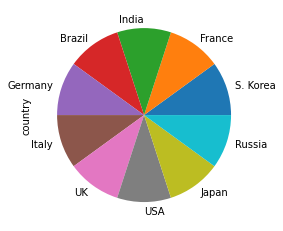

In [28]:
df.head(10).country.value_counts().plot(kind='pie')

In [29]:
#country with population

df.groupby(['country']).population.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
China,1448471400
India,1406631776
USA,334805269
Indonesia,279134505
Pakistan,229488994
Nigeria,216746934
Brazil,215353593
Bangladesh,167885689
Russia,145805947


In [30]:
print('Persentase persebaran populasi 10 terbesar dari negara di dunia: ')
df.head(10)['population'] / df.population.sum() * 100

Persentase persebaran populasi 10 terbesar dari negara di dunia: 


0     4.214073
1    17.704764
2     0.825489
3     2.710578
4     1.055812
5     0.646071
6     0.862158
7     0.758506
8     1.580691
9     1.835207
Name: population, dtype: float64

> Berdasarkan persebaran diatas, dapat diketahui bahwa populasi terbanyak sebuah negara adalah negara China dengan jumlah populasi sebanyak 1,448,471,400 (17.70%) dari jumlah populasi seluruh dunia sebanyak 7,944,933,753 jiwa.

#### totalCases variabel

In [31]:
# total kasus
df.totalCases.sum()

622372853

<AxesSubplot:ylabel='country'>

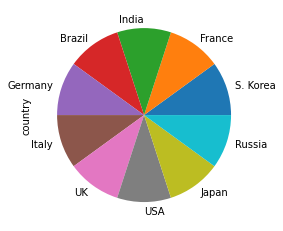

In [32]:
df.head(10).country.value_counts().plot(kind='pie')

In [33]:
#country with totalCases

df.groupby(['country']).totalCases.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
USA,98166904
India,44587307
France,35342950
Brazil,34706757
Germany,33312373
S. Korea,24769101
UK,23621952
Italy,22432803
Japan,21229216


In [34]:
print('Persentase persebaran total negara yang banyak kasus terhadap jumlah totalCases  covid untuk tiap negara: ')
df.head(10)['totalCases'] / df.totalCases.sum() * 100

Persentase persebaran total negara yang banyak kasus terhadap jumlah totalCases  covid untuk tiap negara: 


0    15.773005
1     7.164083
2     5.678742
3     5.576522
4     5.352478
5     3.979785
6     3.795466
7     3.604399
8     3.411013
9     3.365904
Name: totalCases, dtype: float64

> Berdasarkan persebaran diatas, dapat diketahui bahwa dari negara yang memiliki banyak kasus covid adalah USA dengan persentase sebesar 15.77% dari total kasus diseluruh dunia dengan total kasus sebanyak 622,372,853 kasus di 230 Negara di dunia.

<AxesSubplot:ylabel='country'>

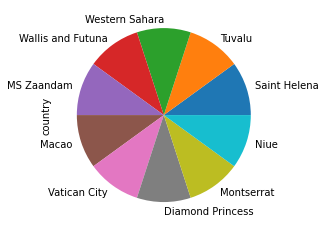

In [35]:
df.tail(10).country.value_counts().plot(kind='pie')

In [36]:
#country with totalCases

df.groupby(['country']).totalCases.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
USA,98166904
India,44587307
France,35342950
Brazil,34706757
Germany,33312373
S. Korea,24769101
UK,23621952
Italy,22432803
Japan,21229216


In [37]:
print('Persentase persebaran total negara yang sedikit kasus terhadap jumlah totalCases  covid untuk tiap negara: ')
df['country']
df.tail(10)['totalCases'] / df.totalCases.sum() * 100

Persentase persebaran total negara yang sedikit kasus terhadap jumlah totalCases  covid untuk tiap negara: 


220    0.000224
221    0.000218
222    0.000127
223    0.000122
224    0.000114
225    0.000013
226    0.000005
227    0.000003
228    0.000002
229    0.000001
Name: totalCases, dtype: float64

In [38]:
#country with totalCases

df.groupby(['country']).totalCases.aggregate(['sum']).sort_values('sum', ascending=False).tail(10)

,sum
country,
Montserrat,1396
Saint Helena,1355
Macao,793
Wallis and Futuna,761
Diamond Princess,712
Niue,80
Vatican City,29
Tuvalu,20
Western Sahara,10


> Selanjutnya, dapat diketahui bahwa dari negara yang memiliki sedikit kasus covid adalah MS Zaandam dengan persentase sebesar 0.000001% dari total kasus diseluruh dunia dengan total kasus sebanyak 622,372,853 kasus di 230 Negara di dunia.

##### totCasesIn1MPop variabel

In [39]:
# total kasus pada 1 juta populasi
df.totCasesIn1MPop.sum()

40953781

In [40]:
#country with totalCases

df.groupby(['country']).totCasesIn1MPop.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
Faeroe Islands,703959
San Marino,609154
Andorra,596762
Gibraltar,596131
Iceland,595371
Martinique,592424
Slovenia,568361
Austria,564539
Saint Pierre Miquelon,553568


In [41]:
print('Persentase persebaran total kasus pada negara yang memiliki 1 juta populasi:')
df.tail(10)['totCasesIn1MPop'] / df.totCasesIn1MPop.sum() * 100

Persentase persebaran total kasus pada negara yang memiliki 1 juta populasi:


220    0.686550
221    0.541064
222    0.002901
223    0.169203
224    0.000000
225    0.120433
226    0.088624
227    0.004048
228    0.000039
229    0.000000
Name: totCasesIn1MPop, dtype: float64

In [42]:
#country with totCasesIn1MPop

df.groupby(['country']).totCasesIn1MPop.aggregate(['sum']).sort_values('sum', ascending=False).tail(10)

,sum
country,
DRC,975
Sierra Leone,933
Tanzania,623
Chad,435
Yemen,383
Niger,381
China,173
Western Sahara,16
MS Zaandam,0


> Berdasarkan analisis diatas dapat diketahui bahwa dari negara yang memiliki kasus covid terbanyak pada sebuah negara yang memiliki >= 1 Juta populasi adalah DRC dengan persentase sebesar 0.686% dengan total kasus sebanyak 40,953,781 kasus.

#### totalDeaths variabel

In [43]:
# total kasus kematian
df.totalDeaths.sum()

6547095

<AxesSubplot:xlabel='count', ylabel='totalDeaths'>

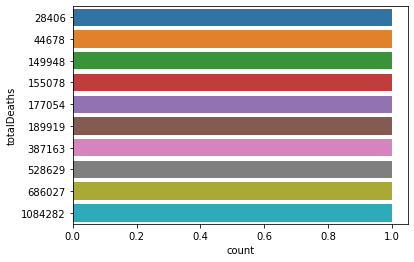

In [44]:
sns.countplot(data=df.head(10), y='totalDeaths')

In [45]:
print('Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: ')
df.head(10)['totalDeaths'] / df.totalDeaths.sum() * 100

Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: 


0    16.561269
1     8.074253
2     2.368654
3    10.478342
4     2.290298
5     0.433872
6     2.900813
7     2.704314
8     0.682410
9     5.913508
Name: totalDeaths, dtype: float64

In [46]:
#country with totalDeaths

df.groupby(['country']).totalDeaths.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
USA,1084282
Brazil,686027
India,528629
Russia,387163
Mexico,330065
Peru,216539
UK,189919
Italy,177054
Indonesia,158093


> Berdasarkan analisis diatas, diketahui bahwa kasus kematian terbanyak terdapat pada negara USA dengan persentase sebesar 16.56% dari 6,547,095 total kasus kematian di 230 Negara di dunia.

<AxesSubplot:>

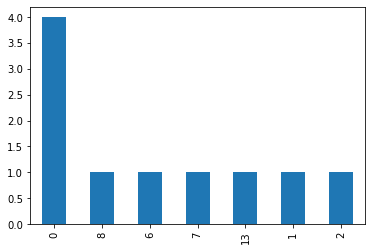

In [47]:
df.tail(10).totalDeaths.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='count', ylabel='totalDeaths'>

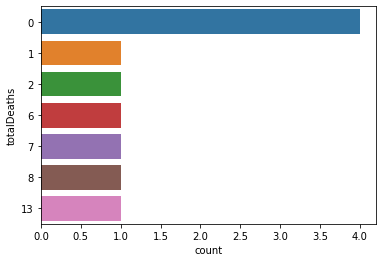

In [48]:
sns.countplot(data=df.tail(10), y='totalDeaths')

In [49]:
print('Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: ')
df.tail(10)['totalDeaths'] / df.totalDeaths.sum() * 100

Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: 


220    0.000122
221    0.000000
222    0.000092
223    0.000107
224    0.000199
225    0.000000
226    0.000000
227    0.000000
228    0.000015
229    0.000031
Name: totalDeaths, dtype: float64

In [50]:
#country with totalDeaths

df.groupby(['country']).totalDeaths.aggregate(['sum']).sort_values('sum', ascending=False).tail(10)

,sum
country,
MS Zaandam,2
Saint Pierre Miquelon,1
Western Sahara,1
Cook Islands,1
Nauru,1
Vatican City,0
Saint Helena,0
Falkland Islands,0
Tuvalu,0


> Berdasarkan analisis diatas, diketahui bahwa tidak terdapat kasus kematian pada 5 negara diantaranya, Niue, Tuvalu, Falkland Islands, Saint Helena, dan Vatican City dengan persentase sebesar 0% dari 6,547,095 total kasus kematian di 230 negara seluruh dunia.

##### deathsIn1MPop variabel

In [51]:
# total kasus kematian pada 1 juta populasi
df.deathsIn1MPop.sum()

267147

In [52]:
#country with deathsIn1MPop

df.groupby(['country']).deathsIn1MPop.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
Peru,6429
Bulgaria,5510
Bosnia and Herzegovina,4966
Hungary,4945
North Macedonia,4581
Montenegro,4429
Georgia,4258
Croatia,4164
Czechia,3824


In [53]:
print('Persentase persebaran kematian pada negara yang memiliki 1 juta populasi:')
df.tail(10)['deathsIn1MPop'] / df.deathsIn1MPop.sum() * 100

Persentase persebaran kematian pada negara yang memiliki 1 juta populasi:


220    0.603039
221    0.000000
222    0.003369
223    0.238446
224    0.000000
225    0.000000
226    0.000000
227    0.000000
228    0.000749
229    0.000000
Name: deathsIn1MPop, dtype: float64

In [54]:
#country with deathsIn1MPop

df.groupby(['country']).deathsIn1MPop.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
Peru,6429
Bulgaria,5510
Bosnia and Herzegovina,4966
Hungary,4945
North Macedonia,4581
Montenegro,4429
Georgia,4258
Croatia,4164
Czechia,3824


> Berdasarkan analisis diatas dapat diketahui bahwa dari negara yang memiliki kasus kematian karena covid terbanyak pada sebuah negara yang memiliki 1 Juta populasi adalah Burundi dengan persentase sebesar  0.603% dengan total kasus sebanyak 267,147 kasus.

#### newDeaths variabel

In [55]:
# total kasus kematian baru
df.newDeaths.sum()

54

<AxesSubplot:xlabel='count', ylabel='newDeaths'>

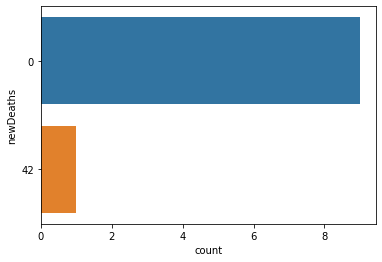

In [56]:
sns.countplot(data=df.head(10), y='newDeaths')

In [57]:
print('Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: ')
df.head(10)['newDeaths'] / df.newDeaths.sum() * 100

Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: 


0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5    77.777778
6     0.000000
7     0.000000
8     0.000000
9     0.000000
Name: newDeaths, dtype: float64

In [58]:
#country with newDeaths

df.groupby(['country']).newDeaths.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
S. Korea,42
Thailand,9
Pakistan,3
Palau,0
Netherlands,0
New Caledonia,0
New Zealand,0
Nicaragua,0
Niger,0


> Berdasarkan analisis diatas, diketahui bahwa data kematian terbaru terbanyak terdapat pada negara S. Korea dengan persentase sebesar 77.778% dari 54 total kasus kematian baru di 230 Negara di dunia.

#### totalRecovered variabel

In [59]:
# total kasus yang pulih
df.totalRecovered.sum()

600752515

<AxesSubplot:xlabel='count', ylabel='totalRecovered'>

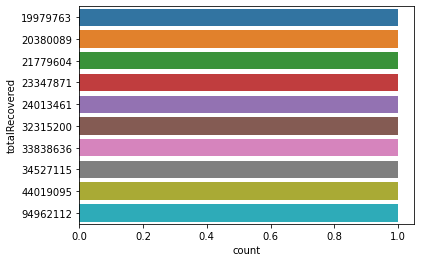

In [60]:
sns.countplot(data=df.head(10), y='totalRecovered')

In [61]:
print('Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: ')
df.head(10)['totalRecovered'] / df.totalRecovered.sum() * 100

Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: 


0    15.807193
1     7.327326
2     5.747311
3     5.632708
4     5.379120
5     3.997230
6     3.886437
7     3.625387
8     3.392427
9     3.325789
Name: totalRecovered, dtype: float64

In [62]:
#country with totalRecovered

df.groupby(['country']).totalRecovered.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
USA,94962112
India,44019095
France,34527115
Brazil,33838636
Germany,32315200
S. Korea,24013461
UK,23347871
Italy,21779604
Japan,20380089


> Berdasarkan analisis diatas, diketahui bahwa total data pasien yang sudah pulih  terbanyak terdapat pada negara USA dengan persentase sebesar 15.807% dari 60,075,2515 total pasien yang pulih di 230 Negara di dunia.

#### seriousCritical variabel

In [63]:
# total kasus serius
df.seriousCritical.sum()

39723

<AxesSubplot:xlabel='count', ylabel='seriousCritical'>

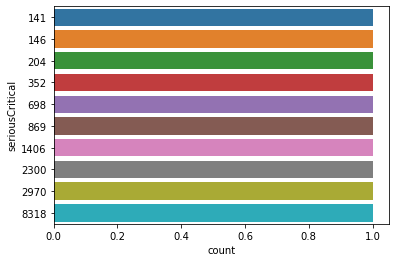

In [64]:
sns.countplot(data=df.head(10), y='seriousCritical')

In [65]:
print('Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: ')
df.head(10)['seriousCritical'] / df.seriousCritical.sum() * 100

Persentase persebaran total negara yang banyak kasus kematian karena covid terhadap jumlah totalCases  covid untuk tiap negara: 


0     7.476777
1     1.757168
2     2.187649
3    20.940010
4     3.539511
5     0.886136
6     0.367545
7     0.354958
8     0.513556
9     5.790096
Name: seriousCritical, dtype: float64

In [66]:
#country with seriousCritical

df.groupby(['country']).seriousCritical.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
Brazil,8318
Mexico,4798
Poland,3086
USA,2970
Indonesia,2771
Russia,2300
Thailand,1496
Germany,1406
Bangladesh,1331


> Berdasarkan analisis diatas, diketahui bahwa total kasus parah terbanyak terdapat pada negara Brazil dengan persentase sebesar 20.94% dari 39,723 total kasus parah di 230 Negara di dunia.

#### totalTests variabel

In [67]:
# total tes 
df.totalTests.sum()

6713202961

<AxesSubplot:xlabel='count', ylabel='totalTests'>

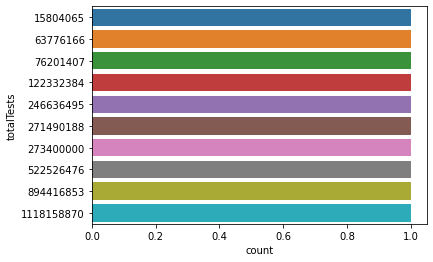

In [68]:
sns.countplot(data=df.head(10), y='totalTests')

In [69]:
print('Persentase persebaran total tes di seluruh negara di dunia: ')
df.head(10)['totalTests'] / df.totalTests.sum() * 100

Persentase persebaran total tes di seluruh negara di dunia: 


0    16.656116
1    13.323251
2     4.044123
3     0.950011
4     1.822266
5     0.235418
6     7.783564
7     3.673902
8     1.135098
9     4.072572
Name: totalTests, dtype: float64

In [70]:
#country with totalTests

df.groupby(['country']).totalTests.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
USA,1118158870
India,894416853
UK,522526476
Spain,471036328
Russia,273400000
France,271490188
Italy,246636495
Austria,197543761
UAE,190586733


> Berdasarkan analisis diatas, diketahui bahwa total tes terbanyak dilakukan pada negara USA dengan persentase sebesar 16.656% dari 6,713,202,961 total tes yang dilakukan di dunia.

> Berdasarkan analisis diatas, diketahui bahwa tidak terdapat kasus kematian pada 5 negara diantaranya, Niue, Tuvalu, Falkland Islands, Saint Helena, dan Vatican City dengan persentase sebesar 0% dari 6,547,095 total kasus kematian di 230 negara seluruh dunia.

##### testIn1MPop variabel

In [71]:
# total tes pada 1 juta populasi
df.testIn1MPop.sum()

438890047

In [72]:
#country with testIn1MPop

df.groupby(['country']).testIn1MPop.aggregate(['sum']).sort_values('sum', ascending=False).head(10)

,sum
country,
Denmark,22004939
Austria,21787811
UAE,18904066
Bermuda,16243126
Gibraltar,15852213
Faeroe Islands,15802409
Turks and Caicos,13841952
Spain,10082298
Greece,9125063


In [73]:
print('Persentase persebaran banyak tes pada negara yang memiliki 1 juta populasi:')
df.tail(10)['testIn1MPop'] / df.testIn1MPop.sum() * 100

Persentase persebaran banyak tes pada negara yang memiliki 1 juta populasi:


220    0.806713
221    0.000000
222    0.002679
223    0.425487
224    0.000000
225    0.000000
226    0.000000
227    0.000000
228    0.000000
229    0.000000
Name: testIn1MPop, dtype: float64

Berdasarkan analisis diatas dapat diketahui bahwa dari negara yang memiliki banyak tes karena covid terdapat pada sebuah negara yang memiliki 1 Juta populasi adalah Denmark dengan persentase sebesar  0.806% dengan total kasus sebanyak 438,890,047 kasus.

### Bivariate Analysis

Lakukan analisis hubungan antar variabel. Bagaimana korelasi antar variabel tersebut? Bagaimana korelasi tiap variabel terhadap variabel dependen?

In [74]:
# Cek korelasi
# PETUNJUK : GUNAKAN CORRELATION HEATMAP.

In [75]:
df

,other,country,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,USA,98166904,1084282,0,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,India,44587307,528629,0,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,France,35342950,155078,0,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,Brazil,34706757,686027,0,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,Germany,33312373,149948,0,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,Niue,80,0,0,80,0,0,49322,0,0,0,1622
226,227,Vatican City,29,0,0,29,0,0,36295,0,0,0,799
227,228,Tuvalu,20,0,0,0,20,0,1658,0,0,0,12066
228,229,Western Sahara,10,1,0,9,0,0,16,2,0,0,626161


In [76]:
correlation = df.corr()
correlation

,other,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
other,1.000000,-0.456926,-0.406473,-0.128796,-0.456027,-0.378748,-0.324108,-0.199688,-0.432628,-0.378103,-0.113927,-0.222258
totalCases,-0.456926,1.000000,0.890969,0.165056,0.999858,0.805833,0.512847,0.144415,0.215211,0.860494,0.065681,0.392321
totalDeaths,-0.406473,0.890969,1.000000,0.000649,0.889719,0.657758,0.716022,0.022657,0.287635,0.787535,0.006103,0.419546
newDeaths,-0.128796,0.165056,0.000649,1.000000,0.164960,0.212382,0.039239,0.095212,-0.043150,-0.009260,-0.039552,0.017917
totalRecovered,-0.456027,0.999858,0.889719,0.164960,1.000000,0.798278,0.509749,0.144940,0.213431,0.862671,0.067124,0.395279
activeCases,-0.378748,0.805833,0.657758,0.212382,0.798278,1.000000,0.412925,0.135501,0.165988,0.587354,0.028046,0.158681
seriousCritical,-0.324108,0.512847,0.716022,0.039239,0.509749,0.412925,1.000000,-0.031728,0.184044,0.290682,-0.055605,0.221893
totCasesIn1MPop,-0.199688,0.144415,0.022657,0.095212,0.144940,0.135501,-0.031728,1.000000,0.462836,0.095678,0.561486,-0.137145
deathsIn1MPop,-0.432628,0.215211,0.287635,-0.043150,0.213431,0.165988,0.184044,0.462836,1.000000,0.164123,0.233089,-0.067940
totalTests,-0.378103,0.860494,0.787535,-0.009260,0.862671,0.587354,0.290682,0.095678,0.164123,1.000000,0.212544,0.543726


<AxesSubplot:>

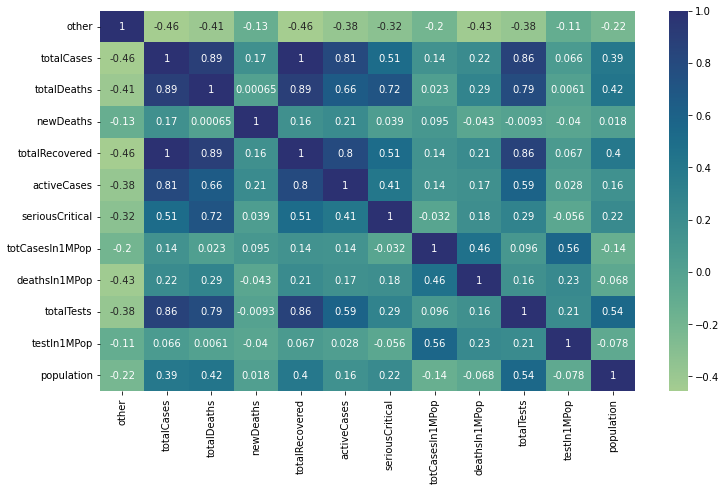

In [77]:
# Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')

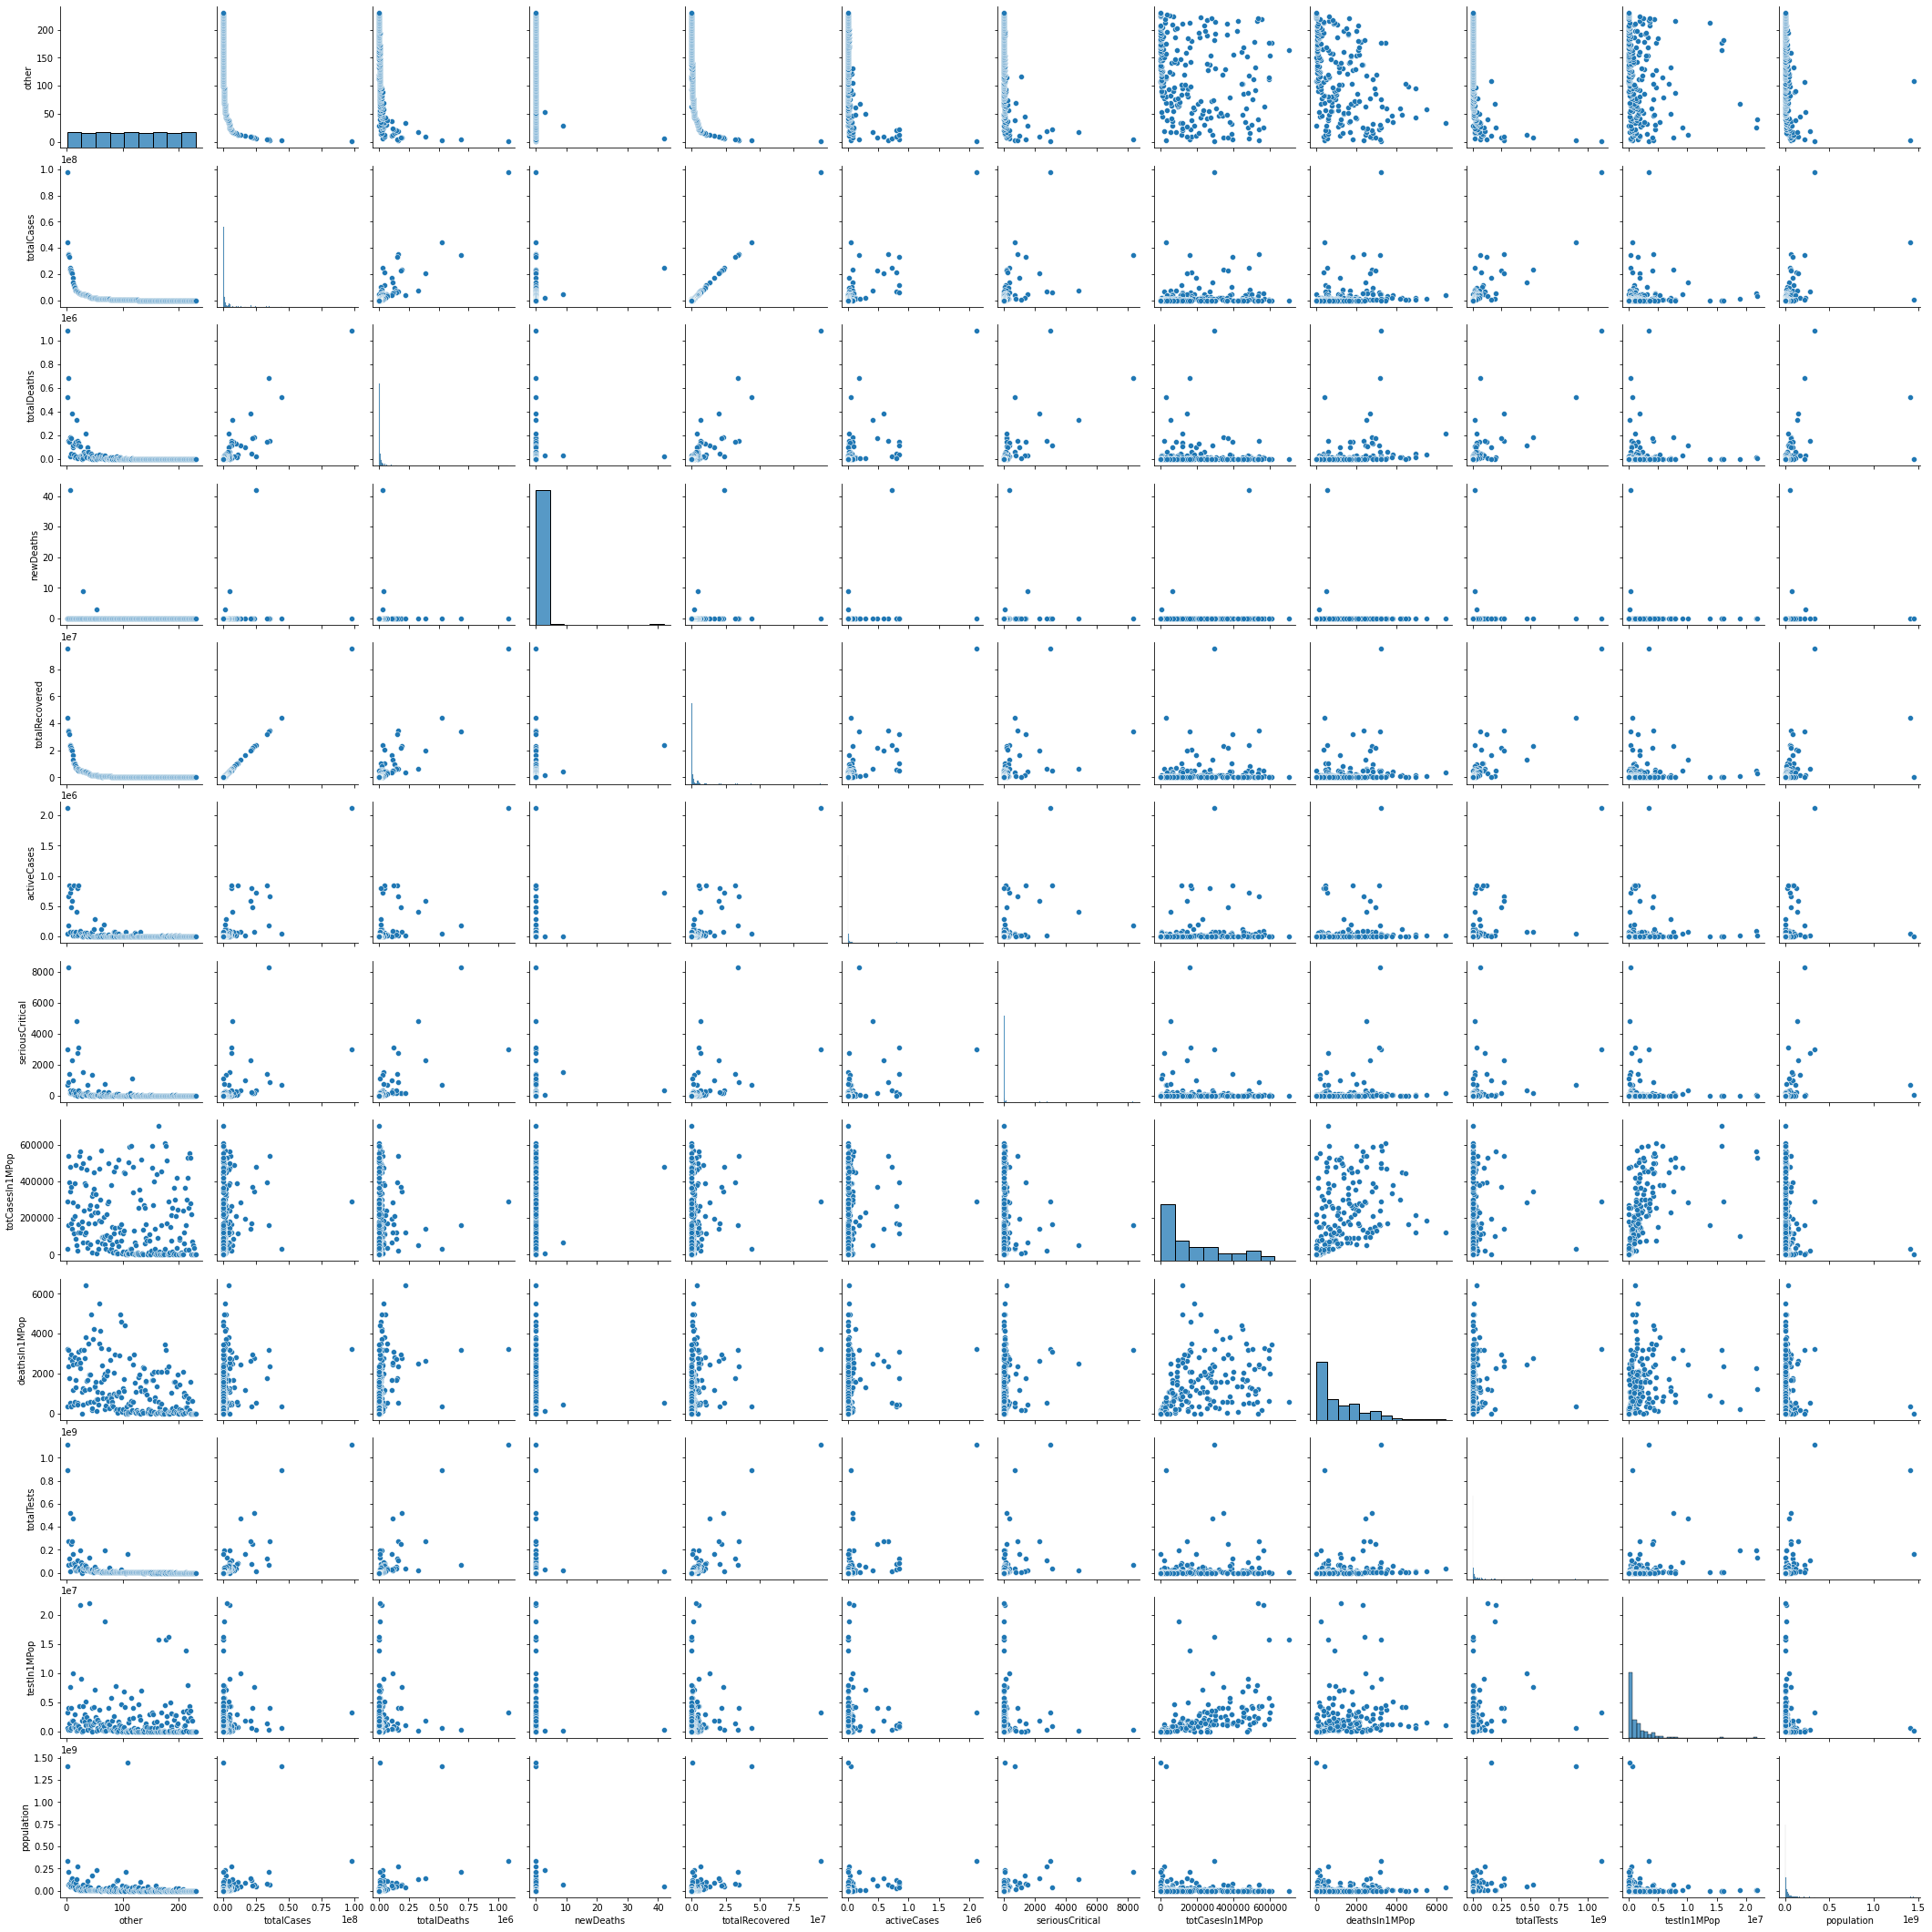

In [78]:
# cek korelasi dengan pairplot
sns.pairplot(df)
plt.show()

> Berdasarkan correlation pada heatmap dan plot diatas, dapat dikatakan bahwa variabel memiliki keterkaitan variabel satu sama lain sehingga hal ini bagus untuk melakukan analisis prediksi pada tahap selanjutnya.

### Kesimpulan EDA

Jelaskan kesimpulan apa saja yang anda dapat dari analisis data, dan bagaimana sebaiknya anda membangun model tersebut.

> Dari analisis yang kita lakukan seluruhnya, kita mendapatkan berbagai informasi-informasi yang bisa digunakan untuk menjawab pertanyaan umum yang sering ditanyakan seperti berapa total kasus covid keseluruhannya termasuk yang masih aktif juga, berapa total kasus yang pulih dari covid, berapa total kasus yang meninggal karena covid, dan juga negara-negara mana penyumbang kasus terbanyak untuk covid ini sendiri, dan lain sebagainya.

> Selanjutnya kita akan mulai membangun model dimana model tersebut akan memprediksi sebuah hal-hal yang mungkin terjadi di masa depan berdasarkan variabel nantinya. Namun, sebelum melangkah ke tahap tersebut kita harus menentukan dulu dependent dan independent variable yang akan kita buatkan modelnya.

## Model Creation

Gunakan kesimpulan yang telah anda dapatkan untuk membangun model. Data mana sajakah yang sebaiknya digunakan? Asumsi apa saja yang harus dimiliki regresi linear? Bagaimana anda memastikannya? Bagaimana jika data tidak memenuhi asumsi tersebut?

> Dalam membangun sebuah model prediksi, diperlukan variabel dependent dan independent untuk melatih mesin pembelajaran kita. Berdasarkan data yang kita punya, kita memilih variabel `activeCases` sebagai variabel dependent (yang akan diprediksi). Selanjutnya, kita akan membagi dependent dan indepent variabel sebanyak 20% dan 80% dari data yang kita punya sebagai data testing dan training nantinya.

> Asumsi yang kita lakukan diantaranya ialah melakukan uji asumsi klasik, seperti `Linearity test, Normality (GOF) test, Multicolinearity, Homoscedasticity, dan sebagainya`. Cara memastikannya ialah dengan melakukan pengujian dari asumsi klasik tersebut berdasarkan variabel target dan predictor-nya.

> Namun, jika data tidak memenuhi asumsi tersebut maka kita <b>tidak dapat</b> menggunakan analisis regresi linear, melainkan analisis regresi non-linear.

### Definisi Regresi Linear Anda

1. Menurut Ronald A. Fisher, `<b>regresi linier</b>` adalah suatu teknik untuk mempelajari hubungan antara dua variabel yang dapat digunakan untuk memprediksi nilai satu variabel berdasarkan nilai variabel yang lain. 

2. Menurut William G. Cochran dan Gertrude M. Cox, `<b>regresi linier</b>` adalah suatu metode statistik yang digunakan untuk mempelajari hubungan antara satu variabel terikat dan satu atau lebih variabel bebas. Tujuannya adalah untuk memprediksi nilai variabel terikat berdasarkan nilai variabel bebas.

3. Menurut J. H. Sanders, `<b>regresi linier</b>` adalah suatu teknik statistik yang digunakan untuk mengetahui hubungan antara dua variabel dimana salah satu variabel digunakan untuk memprediksi variabel lainnya. Hubungan ini dapat digunakan untuk memprediksi nilai variabel terikat berdasarkan nilai variabel bebas.

Berdasarkan pemahaman saya, `<b>regresi linier</b>` adalah sebuah langkah-langkah (algoritma) berbentuk model yang digunakan untuk mengetahui hubungan antar variabel dengan cara melakukan analisis prediksi dan visualisasi dari keterkaitan antar variabel tersebut. Misalnya, model `<b>Regresi linear OLS (Ordinary Less Square)</b>`. `Regresi linear OLS` adalah sebuah model regresi linear dengan metode perhitungan kuadrat terkecil. Namun, dalam penggunaan model regresi ini, terdapat beberapa syarat yang harus dipenuhi agar model prediksi yang dibuat bisa menjadi valid sebagai alat metode prediksi. 

<b>reference<b>
- "Statistical Methods for Research Workers", 1925 <br>
- "Experimental Designs", 1950 <br>
- "Applied Statistics: A Handbook of Techniques", 1977 <br>
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/
- https://medium.com/analytics-vidhya/ordinary-least-square-ols-method-for-linear-regression-ef8ca10aadfc

### Asumsi Regresi Linear

Metode Regresi Linear OLS (Ordinary Less Square).

Dalam uji asumsi klasik juga terdapat beberapa asumsi berdasarkan metode OLS `ordinary least square` diantaranya :
- Asumsi normalitas
- Asumsi heterogenitas
- Asumsi non multikolinieritas

### Makna Rumus Regresi Linear OLS

Makna Rumus Regresi Linear OLS (Ordinary Least Squares) adalah salah satu metode untuk menemukan garis regresi linear terbaik yang dapat digunakan untuk memprediksi nilai variabel dependen (y) dari variabel independen (x).

dimana `sebaran x dan y dibagi sebaran x kuadrat`

### Feature Selection & Engineering

#### Pengujian korelasi untuk memilih independent variabels

In [79]:
df.dtypes

other                 int64
country            category
totalCases            int32
totalDeaths           int32
newDeaths             int32
totalRecovered        int32
activeCases           int32
seriousCritical       int32
totCasesIn1MPop       int32
deathsIn1MPop         int32
totalTests            int32
testIn1MPop           int32
population            int32
dtype: object

In [80]:
# filter data (harus encode dulu yg lain seperti origin,nama tidak perlu karna identifier, karna contoh jadi dibuang)
df = df.select_dtypes(["int64", "int32"])

In [81]:
# import stats untuk GOF test
from scipy import stats

In [82]:
# fungsi untuk GOF test dengan d'agostino
def gof_agostino(data, col):
    k2, p_value = stats.normaltest(data[col])
    if(p_value < 0.05):
        return(f"{col} - Distribution is not Normal (Reject Null Hypothesis)\n")
    else:
        return(f"{col} - Distribution is Normal (Fail to Reject Null Hypothesis)\n")

In [83]:
# cek hasil GOF
for i in df:
    print(gof_agostino(df, i))

other - Distribution is not Normal (Reject Null Hypothesis)

totalCases - Distribution is not Normal (Reject Null Hypothesis)

totalDeaths - Distribution is not Normal (Reject Null Hypothesis)

newDeaths - Distribution is not Normal (Reject Null Hypothesis)

totalRecovered - Distribution is not Normal (Reject Null Hypothesis)

activeCases - Distribution is not Normal (Reject Null Hypothesis)

seriousCritical - Distribution is not Normal (Reject Null Hypothesis)

totCasesIn1MPop - Distribution is not Normal (Reject Null Hypothesis)

deathsIn1MPop - Distribution is not Normal (Reject Null Hypothesis)

totalTests - Distribution is not Normal (Reject Null Hypothesis)

testIn1MPop - Distribution is not Normal (Reject Null Hypothesis)

population - Distribution is not Normal (Reject Null Hypothesis)



In [84]:
# import vif dari statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# cek multicol dengan vif
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns

In [86]:
# cari nilai vif dengan loop
vif_vals=[]
for i in range(len(df.columns)):
    vif_vals.append(variance_inflation_factor(df.values, i))

In [87]:
# apply nilai
vif_data["VIF"] = vif_vals

In [88]:
# cek hasil
vif_data

,feature,VIF
0,other,1.513512
1,totalCases,12179.303605
2,totalDeaths,17.706270
3,newDeaths,1.301139
4,totalRecovered,11461.262725
5,activeCases,9.824356
6,seriousCritical,4.073812
7,totCasesIn1MPop,4.175573
8,deathsIn1MPop,2.680045
9,totalTests,10.683072


In [89]:
# homoscedasticity test dengan levene
def levene_test(data, dep, indep):
    w_stats, p_value = stats.levene(data[dep], data[indep])
    if(p_value < 0.05):
        return(f"{dep} and {indep} - Variance is not equal (Reject Null Hypothesis)\n")
    else:
        return(f"{dep} and {indep} - Variance is equal (Fail to Reject Null Hypothesis)\n")

In [90]:
# cek hasil homoscedasticity
for i in df.drop(columns = "activeCases"):
    print(levene_test(df, "activeCases", i))

activeCases and other - Variance is not equal (Reject Null Hypothesis)

activeCases and totalCases - Variance is not equal (Reject Null Hypothesis)

activeCases and totalDeaths - Variance is equal (Fail to Reject Null Hypothesis)

activeCases and newDeaths - Variance is not equal (Reject Null Hypothesis)

activeCases and totalRecovered - Variance is not equal (Reject Null Hypothesis)

activeCases and seriousCritical - Variance is not equal (Reject Null Hypothesis)

activeCases and totCasesIn1MPop - Variance is not equal (Reject Null Hypothesis)

activeCases and deathsIn1MPop - Variance is not equal (Reject Null Hypothesis)

activeCases and totalTests - Variance is not equal (Reject Null Hypothesis)

activeCases and testIn1MPop - Variance is not equal (Reject Null Hypothesis)

activeCases and population - Variance is not equal (Reject Null Hypothesis)



> Maka dengan asumsi tersebut kita dapat memilih variabel berikut karena dikatakan bahwa seluruh variabel memiliki multikolinearitas

In [91]:
num_feats = df[['totalCases', 'totalDeaths', 'newDeaths', 'totalRecovered', 'seriousCritical', 'totCasesIn1MPop', 'deathsIn1MPop', 'totalTests', 'testIn1MPop', 'population']]

In [92]:
df

,other,totalCases,totalDeaths,newDeaths,totalRecovered,activeCases,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1,98166904,1084282,0,94962112,2120510,2970,293206,3239,1118158870,3339729,334805269
1,2,44587307,528629,0,44019095,39583,698,31698,376,894416853,635857,1406631776
2,3,35342950,155078,0,34527115,660757,869,538892,2365,271490188,4139547,65584518
3,4,34706757,686027,0,33838636,182094,8318,161162,3186,63776166,296146,215353593
4,5,33312373,149948,0,32315200,847225,1406,397126,1788,122332384,1458359,83883596
...,...,...,...,...,...,...,...,...,...,...,...,...
225,226,80,0,0,80,0,0,49322,0,0,0,1622
226,227,29,0,0,29,0,0,36295,0,0,0,799
227,228,20,0,0,0,20,0,1658,0,0,0,12066
228,229,10,1,0,9,0,0,16,2,0,0,626161


In [93]:
num_feats.describe()

,totalCases,totalDeaths,newDeaths,totalRecovered,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.846563e+04,0.234783,2.611967e+06,172.708696,178059.917391,1161.508696,2.918784e+07,1.908218e+06,3.454319e+07
std,8.779899e+06,1.011811e+05,2.835614,8.531834e+06,748.138673,182341.945213,1244.985610,1.106746e+08,3.406741e+06,1.383533e+08
min,9.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.364900e+04,1.840000e+02,0.000000,1.468150e+04,0.000000,16086.500000,131.500000,2.293145e+05,8.924450e+04,4.443825e+05
50%,2.037110e+05,1.951500e+03,0.000000,1.642500e+05,4.000000,116040.000000,733.000000,1.689940e+06,7.054385e+05,5.676382e+06
75%,1.256286e+06,1.327200e+04,0.000000,1.214962e+06,34.500000,292559.750000,1896.750000,1.130354e+07,2.072495e+06,2.197109e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


<AxesSubplot:ylabel='totalCases'>

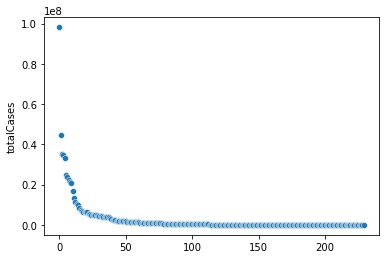

In [94]:
sns.scatterplot(data= df['totalCases'])

<AxesSubplot:ylabel='totalDeaths'>

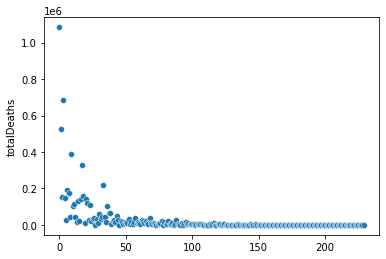

In [95]:
sns.scatterplot(data= df['totalDeaths'])

<AxesSubplot:ylabel='totalRecovered'>

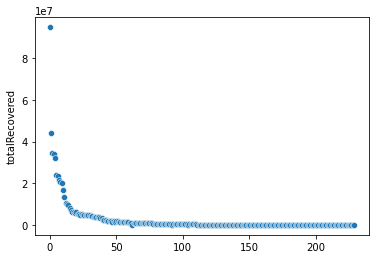

In [96]:
sns.scatterplot(data= df['totalRecovered'])

Berdasarkan cuplikan grafik dari beberapa variabel dapat disimpulkan bahwa kita coba menggunakan `MinMaxScaler` karena data yang kita punya memiliki outlier yang cukup tinggi.

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.51771791e-01, 2.31143859e-01],
       [4.54198923e-01, 4.87538297e-01, 0.00000000e+00, ...,
        7.99901407e-01, 2.88961037e-02, 9.71114636e-01],
       [3.60029122e-01, 1.43023678e-01, 0.00000000e+00, ...,
        2.42801086e-01, 1.88118995e-01, 4.52784349e-02],
       ...,
       [1.12054069e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.33016102e-06],
       [1.01867335e-08, 9.22269299e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.32290896e-04],
       [0.00000000e+00, 1.84453860e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [98]:
num_scaled_df = pd.DataFrame(num_scaled, columns=num_feats.columns, index=num_feats.index)
num_scaled_df.describe()

,totalCases,totalDeaths,newDeaths,totalRecovered,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.027565,0.026253,0.005590,0.027505,0.020763,0.252941,0.180667,0.026103,0.086718,0.023848
std,0.089438,0.093316,0.067515,0.089845,0.089942,0.259024,0.193652,0.098979,0.154817,0.095517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000241,0.000170,0.000000,0.000155,0.000000,0.022851,0.020454,0.000205,0.004056,0.000307
50%,0.002075,0.001800,0.000000,0.001730,0.000481,0.164839,0.114015,0.001511,0.032058,0.003919
75%,0.012797,0.012240,0.000000,0.012794,0.004148,0.415592,0.295030,0.010109,0.094183,0.015168
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


`bandingkan dengan dataset sebelumnya`

In [99]:
num_feats.describe()

,totalCases,totalDeaths,newDeaths,totalRecovered,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
count,2.300000e+02,2.300000e+02,230.000000,2.300000e+02,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02
mean,2.705969e+06,2.846563e+04,0.234783,2.611967e+06,172.708696,178059.917391,1161.508696,2.918784e+07,1.908218e+06,3.454319e+07
std,8.779899e+06,1.011811e+05,2.835614,8.531834e+06,748.138673,182341.945213,1244.985610,1.106746e+08,3.406741e+06,1.383533e+08
min,9.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.364900e+04,1.840000e+02,0.000000,1.468150e+04,0.000000,16086.500000,131.500000,2.293145e+05,8.924450e+04,4.443825e+05
50%,2.037110e+05,1.951500e+03,0.000000,1.642500e+05,4.000000,116040.000000,733.000000,1.689940e+06,7.054385e+05,5.676382e+06
75%,1.256286e+06,1.327200e+04,0.000000,1.214962e+06,34.500000,292559.750000,1896.750000,1.130354e+07,2.072495e+06,2.197109e+07
max,9.816690e+07,1.084282e+06,42.000000,9.496211e+07,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


### Model Fitting, Creation, and Visualization

In [100]:
df1 = num_scaled_df
df2 = df[['activeCases']]

In [101]:
df1.head()

,totalCases,totalDeaths,newDeaths,totalRecovered,seriousCritical,totCasesIn1MPop,deathsIn1MPop,totalTests,testIn1MPop,population
0,1.000000,1.000000,0.0,1.000000,0.357057,0.416510,0.503811,1.000000,0.151772,0.231144
1,0.454199,0.487538,0.0,0.463544,0.083914,0.045028,0.058485,0.799901,0.028896,0.971115
2,0.360029,0.143024,0.0,0.363588,0.104472,0.765516,0.367864,0.242801,0.188119,0.045278
3,0.353548,0.632702,0.0,0.356338,1.000000,0.228937,0.495567,0.057037,0.013458,0.148676
4,0.339344,0.138292,0.0,0.340296,0.169031,0.564132,0.278115,0.109405,0.066274,0.057912


In [102]:
df2.head()

,activeCases
0,2120510
1,39583
2,660757
3,182094
4,847225


`split the variabel`

In [103]:
# split target variable
X = df1.values
y = df2.values.reshape(-1,1)

In [104]:
X

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.51771791e-01, 2.31143859e-01],
       [4.54198923e-01, 4.87538297e-01, 0.00000000e+00, ...,
        7.99901407e-01, 2.88961037e-02, 9.71114636e-01],
       [3.60029122e-01, 1.43023678e-01, 0.00000000e+00, ...,
        2.42801086e-01, 1.88118995e-01, 4.52784349e-02],
       ...,
       [1.12054069e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.33016102e-06],
       [1.01867335e-08, 9.22269299e-07, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.32290896e-04],
       [0.00000000e+00, 1.84453860e-06, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [105]:
y

array([[2120510],
       [  39583],
       [ 660757],
       [ 182094],
       [ 847225],
       [ 727234],
       [  84162],
       [ 476145],
       [ 804449],
       [ 581544],
       [  18353],
       [  79287],
       [ 843821],
       [  60761],
       [  15175],
       [  37229],
       [  78529],
       [ 400470],
       [  18357],
       [ 803743],
       [  30888],
       [ 836193],
       [  70827],
       [  94457],
       [  91202],
       [  50178],
       [  25174],
       [      0],
       [   6459],
       [   8004],
       [  18350],
       [  49021],
       [  57109],
       [  11948],
       [  24088],
       [  57291],
       [   7319],
       [  28172],
       [  20230],
       [  10370],
       [  20122],
       [    923],
       [  43994],
       [  32464],
       [  30626],
       [  81415],
       [   4827],
       [ 126498],
       [   8857],
       [ 281988],
       [   1868],
       [   7343],
       [   5058],
       [   1112],
       [   1338],
       [  

In [106]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [107]:
# model train dan fitting
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [108]:
# nilai slope dan intercept
print("slope:", model.coef_)
print("intercept:", model.intercept_)

slope: [[ 6.19305455e+07 -8.69522431e+05 -1.66838042e+05 -5.89257136e+07
   7.27302412e+04 -1.08632089e+04 -1.31910061e+04 -1.56777381e+05
   1.69029360e+04 -9.07528412e+04]]
intercept: [-1172.21748563]


In [109]:
# buat ypredict
y_pred = model.predict(X_test)

In [110]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["X1"] = [i[0] for i in X_test]
result["X2"] = [i[1] for i in X_test]
result["y_act"] = [i for i in y_test.flatten()]
result["y_pred"] = y_pred.flatten()

In [111]:
#cek hasil
result.head()

,X1,X2,y_act,y_pred
0,0.000748,0.001311,13,-3532.719806
1,0.000093,0.000135,29,-5367.325893
2,0.001722,0.001346,334,-1961.658504
3,0.000160,0.000068,22,-4079.854866
4,0.000701,0.000630,64,-5506.831968


#### Mari kita lihat visualisasinya

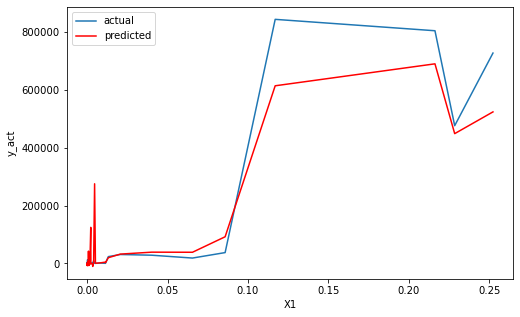

In [112]:
# plot actual vs predicted dengan lineplot
plt.figure(figsize = (8,5))
sns.lineplot(data = result, x = "X1", y="y_act", label = "actual")
sns.lineplot(data = result, x = "X1", y ="y_pred", color = "red", label = "predicted")
plt.show()

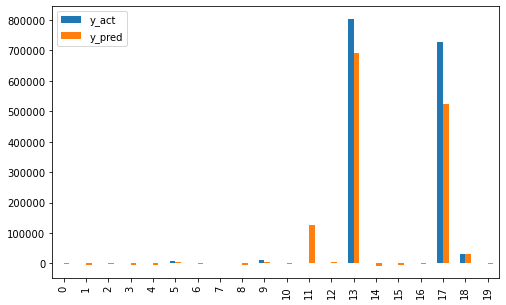

In [113]:
#plot actual vs predicted dengan barplot
result[['y_act', 'y_pred']].head(20).plot(kind='bar', figsize=(8,5))
plt.show()

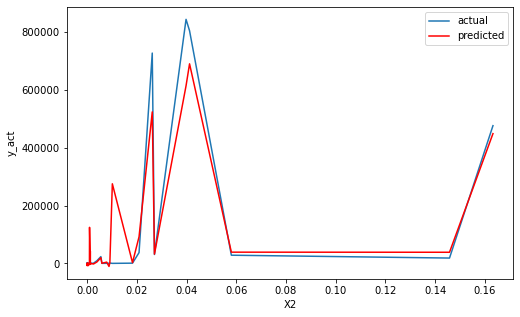

In [114]:
# plot actual vs predicted dengan lineplot
plt.figure(figsize = (8,5))
sns.lineplot(data = result, x = "X2", y= "y_act", label = "actual")
sns.lineplot(data = result, x = "X2", y = "y_pred", color = "red", label = "predicted")
plt.show()

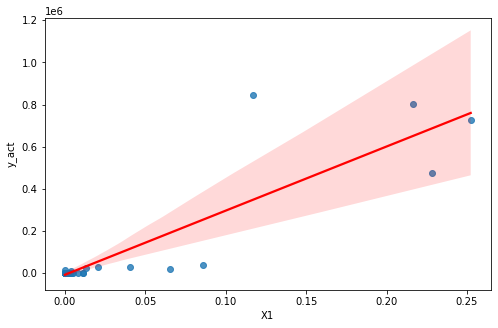

In [115]:
# plot hasil prediksi best fit
plt.figure(figsize=(8,5))
sns.regplot(data = result, x ='X1', y ='y_act', line_kws = {"color":"red"})
plt.show()

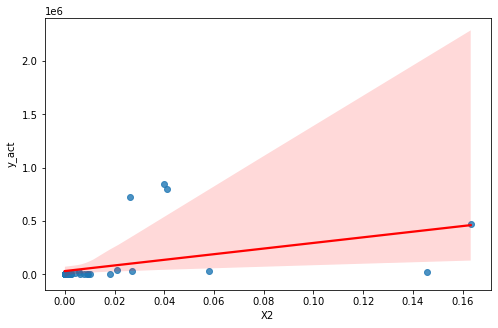

In [116]:
# plot hasil prediksi best fit
plt.figure(figsize=(8,5))
sns.regplot(data = result, x ='X2', y ='y_act', line_kws = {"color":"red"})
plt.show()

> Dari beberapa visualisasi diatas dapat dikatakan bahwa bentuk model kita cocok dan memiliki keakuratan yang bagus yang hampir mendekati dengan nilai actualnya. Meskipun terdapat beberapa outlier, data kita masih dapat dikatakan bagus dalam memprediksi.

In [117]:
# gunakan r2_score dari sklearn untuk melihat r2 scorenya
round(metrics.r2_score(y_test, y_pred), 2)

0.89

> Dari hasil diatas , dapat disimpulkan bahwa variabel X1 dan variabel X2 berpengaruh secara bersama-sama terhadap variabel y sebesar 89% (0.89).
Sedangkan sisanya dipengaruhi oleh variabel lain diluar persamaan ini

## Model Testing

Evaluasi performa model anda!

In [118]:
# evaluasi model (pilih salahsatu saja)
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Absolute Percentage Error (MAPE): ", metrics.mean_absolute_percentage_error(y_test, y_pred))
print("Mean Squared Error (MSE): ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error (MAE):  26926.26663093447
Mean Absolute Percentage Error (MAPE):  4.3276506424597955e+19
Mean Squared Error (MSE):  4462868195.414693
Root Mean Squared Error (RMSE):  66804.70189600949


> Evaluasi model yang kita gunakan adalah MAPE karena MAPE merupakan metric yang digunakan untuk menghitung performa dari model kita.

> Berdasarkan perhitungan evaluasi model diatas, dengan menggunakan evaluasi MAPE dapat dikatakan bahwa model kita akurat dan dapat diterima karena berada pada kurang dari 5%.

<b>NOTE:</b>
- MAE  : mengukur rata-rata absolute dari selisih antara nilai aktual dan prediksi.
- MAPE : mengukur rata-rata relatif selisih persentase antara nilai aktual dan prediksi.
- MSE  : mengukur rata-rata dari selisih kuadrat antara nilai aktual dan prediksi.
- RMSE (akar kuadrat dari MSE): mengukur akar rata-rata dari selisih kuadrat antara nilai aktual dan prediksi.

#### Model Score untuk model data kita

In [119]:
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                    model.score(X_test, y_test)*100],
            index = ["Model Score in data train", "Model Score in data test"],
            columns = ["Score(%)"]
            )

,Score(%)
Model Score in data train,88.358609
Model Score in data test,89.310174


> Berdasarkan Model Score yang dihasilkan kita bisa menyatakan bahwa model yang kita buat merupakan model best fit yang mana score pada train data dan test data memiliki nilai yang baik.